In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Calculations



In [2]:
data = pd.read_csv('test-horizontal-impactor_13_15.txt',encoding="latin-1",sep="	")

In [3]:
data["Time[ms]"] =data["Time[ms]"].str.replace(",",".")
data["Velocity[m/s]"] = data["Velocity[m/s]"].str.replace(",",".")

In [4]:
data["Time[ms]"]=pd.to_numeric(data["Time[ms]"])
data["Velocity[m/s]"]=pd.to_numeric(data["Velocity[m/s]"])


In [5]:
data.head(5)

,Time[ms],Velocity[m/s]
0,0.0,0.0
1,0.1,0.0
2,0.3,0.1
3,0.4,0.1
4,0.5,0.1


These calculations were made with data from the horizontal impactor system.The x-axis shows time in milliseconds and the y-axis shows speed in meters per second.Our graph shows that 7 m/s is our initial speed.

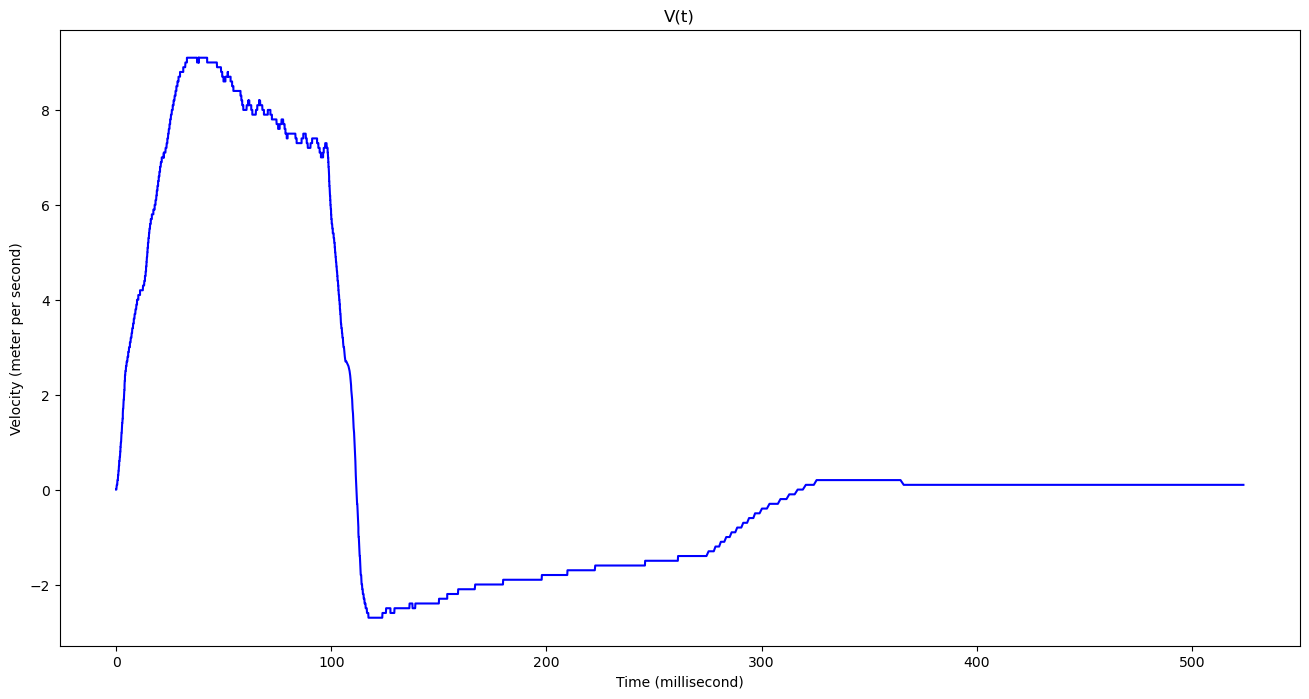

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(data["Time[ms]"], data["Velocity[m/s]"], color="blue")
plt.xlabel("Time (millisecond)")
plt.ylabel("Velocity (meter per second)")
plt.title("V(t)")
plt.show()

This graph shows us that the impactor movement has several parts.These are:
    1)Rapid acceleration
    2)Constant average speed, which is constantly decreasing due to friction
    3)Impact and deflection
    4)Negative Speed
We will make energy absorption calculations from the impact and deflection parts.

In [7]:
impact = data[(data["Time[ms]"] >= 98) & (data["Time[ms]"] < 120)]

In [8]:
impact.head()

,Time[ms],Velocity[m/s]
3581,98.0,7.2
3582,98.0,7.2
3583,98.0,7.2
3584,98.1,7.2
3585,98.1,7.2


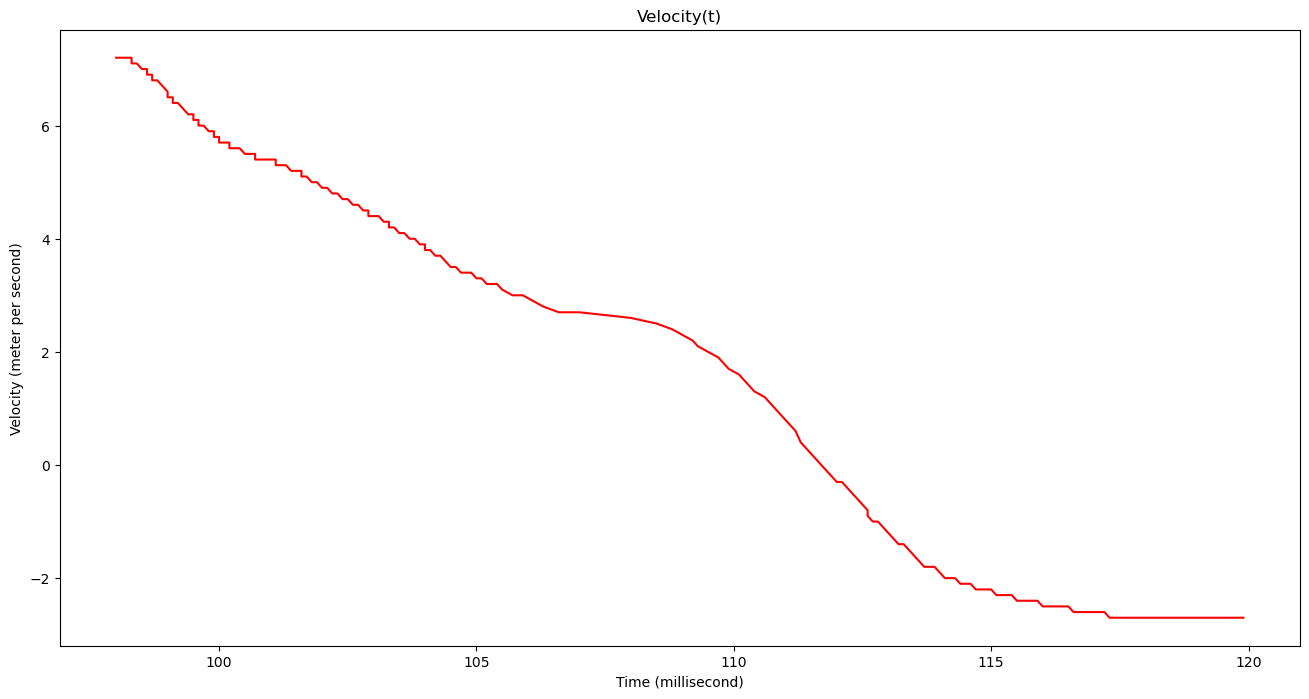

In [9]:
plt.figure(figsize=(16, 8))
plt.plot(impact["Time[ms]"], impact["Velocity[m/s]"], color="red")
plt.xlabel("Time (millisecond)")
plt.ylabel("Velocity (meter per second)")
plt.title("Velocity(t)")
plt.show()

In [10]:
impact.drop_duplicates(subset="Time[ms]", inplace=True) #Since repetitive time values can distort our derivative and integral calculations, we need to remove them from the dataframe.

C:\Users\samio\AppData\Local\Temp\ipykernel_8248\708467671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impact.drop_duplicates(subset="Time[ms]", inplace=True) #Since repetitive time values can distort our derivative and integral calculations, we need to remove them from the dataframe.


In [11]:
impact = impact.drop(impact.index[-1])
velocity = np.append(impact["Velocity[m/s]"], impact["Velocity[m/s]"].iloc[-1])
time = np.append(impact["Time[ms]"], impact["Time[ms]"].iloc[-1])
impact["Acceleration"] = np.diff(velocity) / np.diff(time)
#We make derivative for finding Acceleration

C:\Users\samio\AppData\Local\Temp\ipykernel_8248\2744951676.py:4: RuntimeWarning: invalid value encountered in true_divide
  impact["Acceleration"] = np.diff(velocity) / np.diff(time)


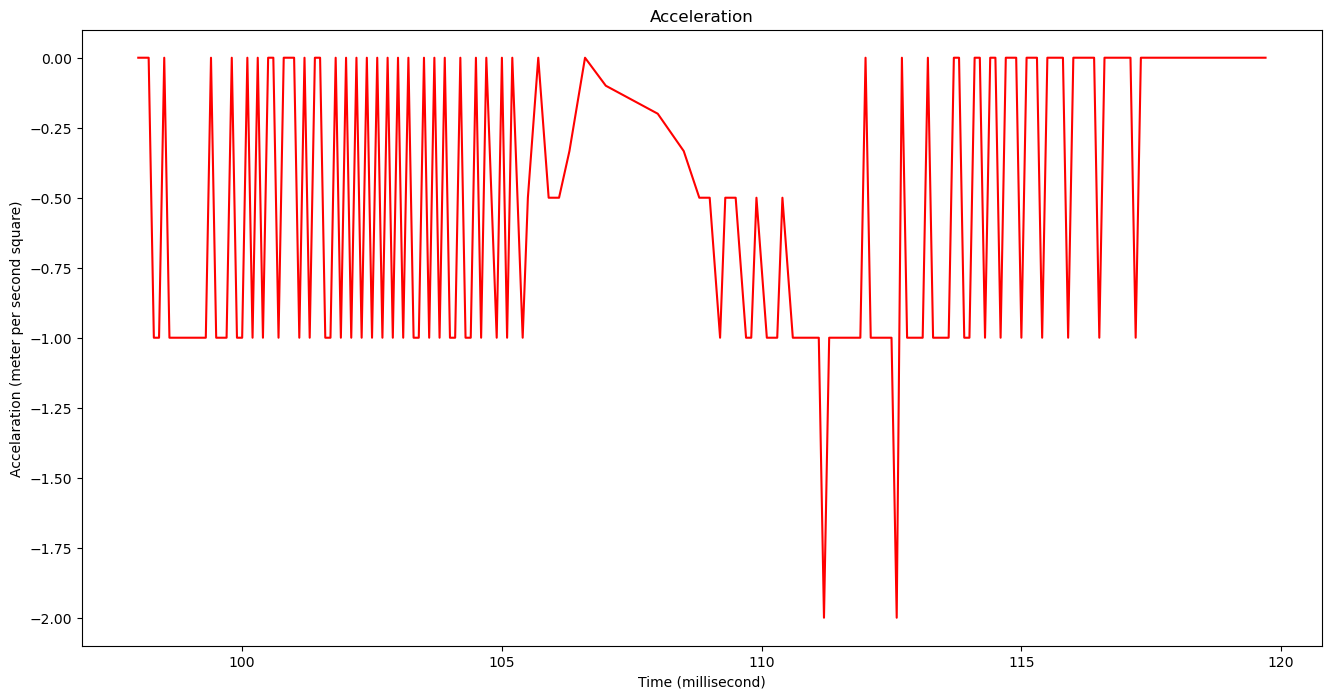

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(impact["Time[ms]"], impact["Acceleration"], color="red")
plt.xlabel("Time (millisecond)")
plt.ylabel("Accelaration (meter per second square)")
plt.title("Acceleration")
plt.show()

In [13]:
displacement = impact["Velocity[m/s]"].diff() * impact["Time[ms]"][1:]
sum_displacements = displacement.cumsum()


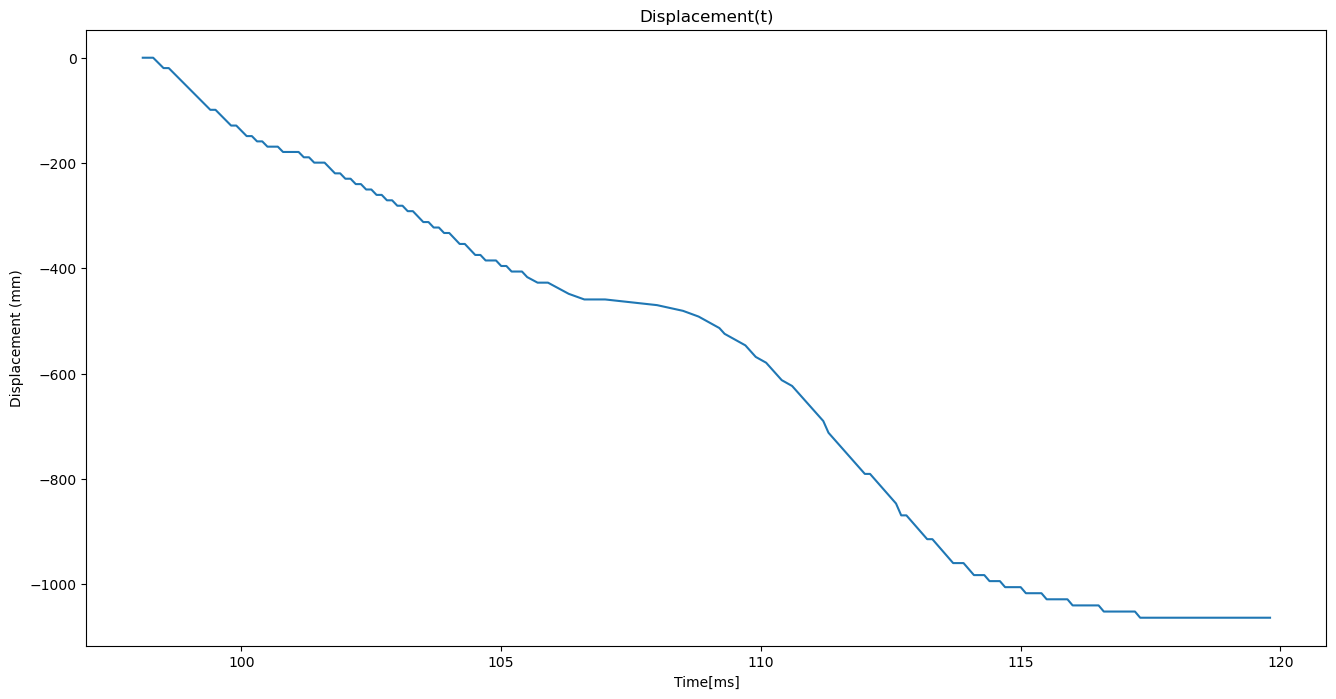

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(impact["Time[ms]"], sum_displacements)
plt.xlabel("Time[ms]")
plt.ylabel('Displacement (mm)')
plt.title("Displacement(t)")
plt.show()

In [15]:
#For calculating Force we should use Newton's 2nd Law F = m *a 
#m = 13 kg

impact["Force"] = impact["Acceleration"]*13

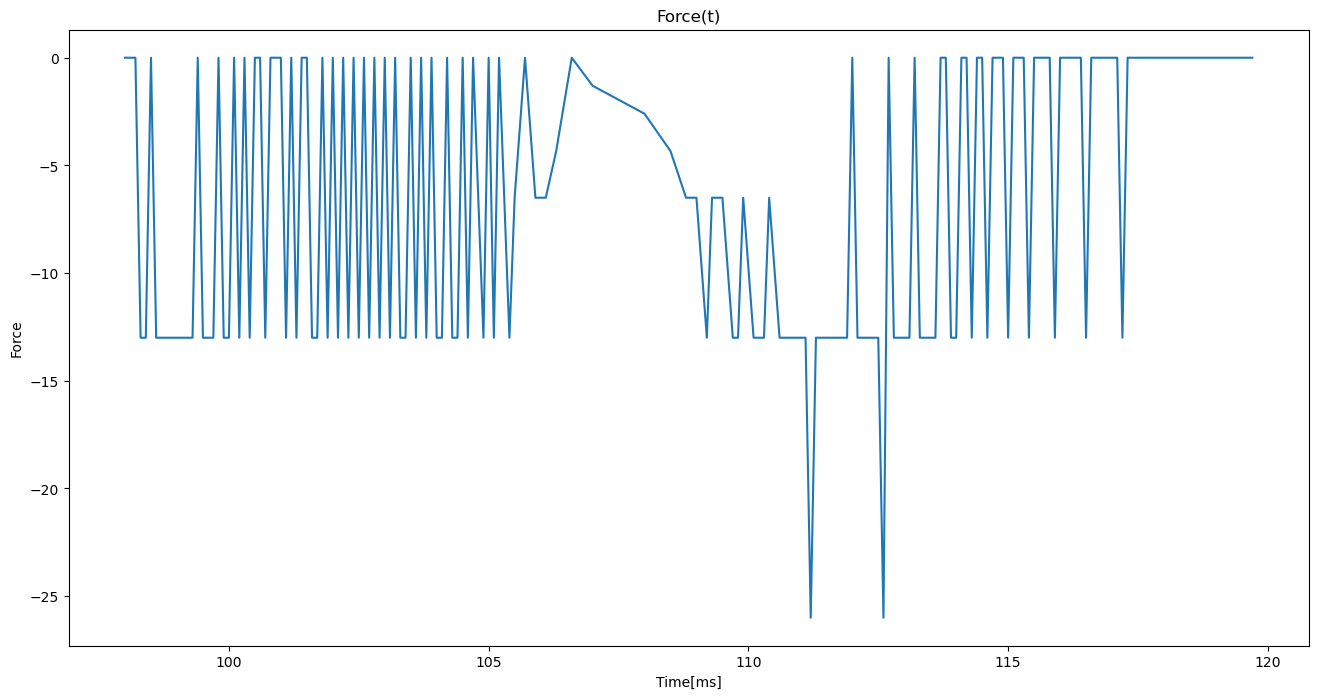

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(impact["Time[ms]"], impact["Force"])
plt.xlabel("Time[ms]")
plt.ylabel('Force')
plt.title("Force(t)")
plt.show()

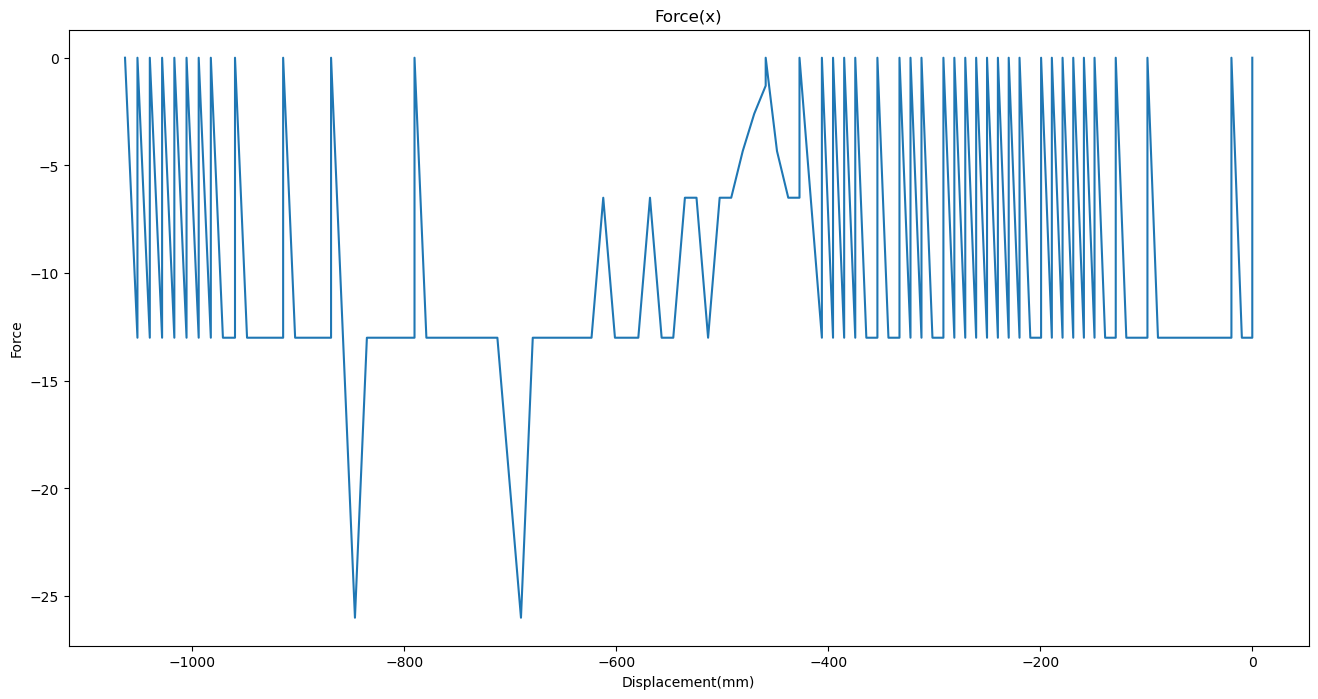

In [23]:
#For Calculation Energy Absorbation , Energy Absorbation is Under the area Force and Displacement Graph
plt.figure(figsize=(16, 8))
plt.plot(sum_displacements, impact["Force"])
plt.xlabel("Displacement(mm)")
plt.ylabel('Force')
plt.title("Force(x)")
plt.show()

In [24]:
#For integrate Force and Displacement Graph
absorbtion = impact["Force"].diff() * sum_displacements[1:]
sum_absorbtions = absorbtion.cumsum()

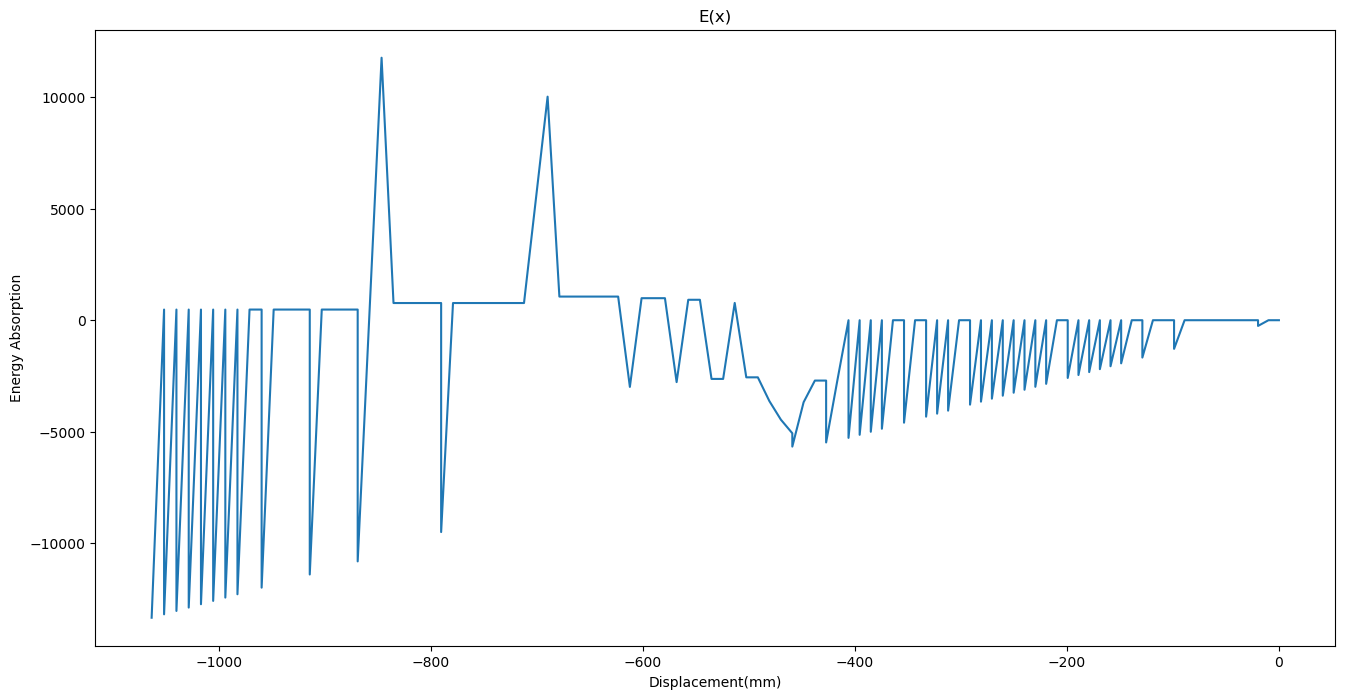

In [25]:
#For Calculation Energy Absorbation , Energy Absorbation is Under the area Force and Displacement Graph
plt.figure(figsize=(16, 8))
plt.plot(sum_displacements, sum_absorbtions)
plt.xlabel("Displacement(mm)")
plt.ylabel('Energy Absorption')
plt.title("E(x)")
plt.show()